In [1]:
import stk
from rdkit.Chem import AllChem as rdkit
import sys
import os
from rdkit.Chem import RDConfig
from rdkit.Chem.Draw import IPythonConsole
sys.path.append(RDConfig.RDContribDir)

RDKit WARNING: [18:05:16] Enabling RDKit 2019.09.1 jupyter extensions


In [2]:
from pathlib import Path

In [25]:
sys.path.append(
    '/rds/general/user/sb2518/home/WORK/main_projects/synthetic_accessibility_project'
    '/stages/stage2_evolutionary_algorithm/create_image/utilities')
sys.path.append('/rds/general/user/sb2518/home/WORK/main_projects/'
                'synthetic_accessibility_project/stages'
                '/stage1_synthetic_accessibility_model_training/create_image')

In [26]:
from sascore.sascorer import calculateScore
from scscore.scscore import SCScore
from model_training import SAScore
scscore = SCScore()


In [32]:
model = SAScore()
model.load_data('/rds/general/user/sb2518/home/WORK/main_projects/synthetic_accessibility_project/stages/stage1_synthetic_accessibility_model_training'
                  '/create_image/databases/combined_data.csv')

RDKit WARNING: [18:57:34] Conflicting single bond directions around double bond at index 3.
RDKit WARNING: [18:57:34]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [18:57:34] Conflicting single bond directions around double bond at index 1.
RDKit WARNING: [18:57:34]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [18:57:35] Conflicting single bond directions around double bond at index 2.
RDKit WARNING: [18:57:35]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [18:57:35] Conflicting single bond directions around double bond at index 1.
RDKit WARNING: [18:57:35]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [18:57:38] Conflicting single bond directions around double bond at index 2.
RDKit WARNING: [18:57:38]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [18:57:40] Conflicting single bond direc

In [33]:
model.random_forest()

In [38]:
import numpy as np
model.train(X=np.zeros(1), y=np.zeros(1))

In [14]:
database = Path('/rds/general/user/sb2518/home/WORK/main_projects/synthetic_accessibility_project/'
                'stages/stage2_evolutionary_algorithm/create_image/databases/filtered_precursors')
amines = list(database.glob('amine2/*.mol'))
aldehydes = list(database.glob('aldehyde3/*.mol'))


In [39]:
import itertools
from model_training import get_fingerprint

In [132]:
mol = rdkit.MolFromMolFile(str(amines[0]))

In [134]:
rdkit.EmbedMultipleConfs(mol)

In [140]:
dir(mol.GetConformer(1))

['ClearComputedProps',
 'ClearProp',
 'GetAtomPosition',
 'GetBoolProp',
 'GetDoubleProp',
 'GetId',
 'GetIntProp',
 'GetNumAtoms',
 'GetOwningMol',
 'GetPositions',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetUnsignedProp',
 'HasOwningMol',
 'HasProp',
 'Is3D',
 'Set3D',
 'SetAtomPosition',
 'SetBoolProp',
 'SetDoubleProp',
 'SetId',
 'SetIntProp',
 'SetProp',
 'SetUnsignedProp',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [149]:
mol.GetConformer(7).SetId(0)

In [150]:
mol.GetConformers()

(<rdkit.Chem.rdchem.Conformer at 0x2b94924ee5d0>,
 <rdkit.Chem.rdchem.Conformer at 0x2b949251ea50>)

In [ ]:
from rdkit.Chem.PyMol import MolViewer
v = MolViewer()

In [46]:
sa_scores = []
sc_scores = []
ml_model_scores = []
for combination in itertools.product(amines, aldehydes):
    for mol in combination:
        sa_score = []
        sc_score = []
        ml_score = []
        rdkit_mol = rdkit.MolFromMolFile(str(mol))
        rdkit_mol.UpdatePropertyCache()
        rdkit.GetSymmSSSR(rdkit_mol)
        rdkit_mol.GetRingInfo()
        sa_score.append(calculateScore(rdkit_mol))
        sc_score.append(scscore.score(rdkit_mol))
        fingerprint = get_fingerprint(rdkit_mol)
        ml_score.append(model.model.predict_proba(np.array(fingerprint).reshape(1, -1)))
    sa_scores.append(sum(sa_score))
    sc_scores.append(sum(sc_score))
    ml_model_scores.append(sum(ml_score))

In [52]:
import pandas as pd

In [98]:
df = pd.DataFrame(zip(sa_scores, sc_scores, ml_scores_altered))

In [268]:
ml_scores_altered = [score[0][1] for score in ml_model_scores]

In [269]:
df

,0,1,2
0,3.411683,1.771309,0.159013
1,3.336393,2.214876,0.253123
2,3.910463,2.636551,0.000000
3,3.271723,2.102218,0.000000
4,5.238709,1.779251,0.357188
...,...,...,...
50782,2.606321,2.406128,0.000000
50783,3.660917,2.456233,1.000000
50784,2.000995,2.012053,0.100000
50785,1.987816,2.790262,0.000000


In [91]:
len(model.labels)

12703

In [270]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [100]:
normalized_df

,0,1,2
0,0.341012,0.171897,0.159013
1,0.324594,0.355193,0.253123
2,0.449777,0.529443,0.000000
3,0.310492,0.308639,0.000000
4,0.739416,0.175179,0.357188
...,...,...,...
50782,0.165394,0.434224,0.000000
50783,0.395360,0.454929,1.000000
50784,0.033395,0.271380,0.100000
50785,0.030522,0.592961,0.000000


In [106]:
normalized_df.corr(method='pearson')

,0,1,2
0,1.000000,-0.162583,0.394628
1,-0.162583,1.000000,-0.062875
2,0.394628,-0.062875,1.000000


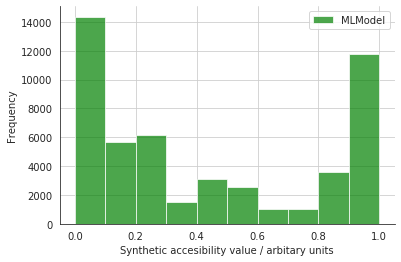

In [271]:
sns.set_style('white')
# ax = normalized_df[0].hist(bins=10)
# ax2 = normalized_df[1].hist(bins=10, alpha=0.7, color='orange')
ax3 = normalized_df[2].hist(bins=10, alpha=0.7, color='green')
ax3.legend(['MLModel'])
ax3.set_xlabel('Synthetic accesibility value / arbitary units')
ax3.set_ylabel('Frequency')
sns.despine()
ax3.figure.savefig('total_ml.svg')

In [263]:
normalized_df[2].idxmax()

10

In [242]:
combs = list(itertools.product(amines, aldehydes))

In [264]:
good_mols = [rdkit.MolFromMolFile(str(comb)) for comb in combs[10]]

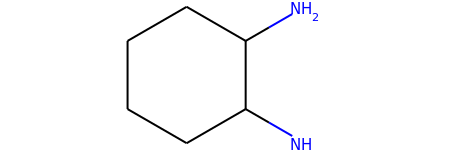

In [267]:
rdkit.MolFromSmiles(rdkit.MolToSmiles(good_mols[0]))

In [199]:
calculateScore(good_mols[0]) + calculateScore(good_mols[1])

9.516528335675902

In [234]:
normalized_df[0].value_counts()

513

In [ ]:
import seaborn as sns

TypeError: 'AxesSubplot' object is not subscriptable